Merge Sort:


In [ ]:
def Merge(D,L,R):
  li = 0
  ri = 0
  i = 0
  for i in range(len(D)):
    if li >= len(L):
      D[i] = R[ri]
      ri = ri + 1
    elif ri >= len(R):
      D[i] = L[li]
      li = li + 1
    else:
      if L[li] < R[ri]:
        D[i] = L[li]
        li = li + 1
      else:
        D[i] = R[ri]
        ri = ri + 1    

def MergeSort(A):
  if len(A) > 1:
    L = A[0: int(len(A)//2)]
    R = A[int(len(A)//2):len(A)]
    MergeSort(L)
    MergeSort(R)
    Merge(A,L,R)
  return A

#PARA TESTAR:
import random
import operator

def Teste_MergeSort(size):
  print('TESTE - MERGE SORT\n\n')
  for i in range(size):
    B, x = [],[]
    x = random.sample(range(100),  (5+i))
    print('array randomizado: ', x)
    x_merge= MergeSort(x)
    B = x
    B=sorted(B)
    texto = all(map(operator.eq, B, x_merge))
    print('\narray sorted: ', B)
    print('\narray merge: ', x_merge)
    print('\nresultado : ', str(texto))
    print('--------------------------------------\n\n')

In [ ]:
Teste_MergeSort(10)

 QuickSort com Hoare Partition:

In [ ]:
def HoarePartition(A,i,j):
  l = i
  p = j
  r = j - 1
  while l <= r:
    while l <= r and A[l] < A[p]:
      l = l + 1
    while l <= r and A[r] > A[p]:
      r = r - 1
    if (l<=r):
      A[l], A[r] = A[r],A[l]
      l = l + 1
      r = r - 1
  A[l], A[p] = A[p],A[l]
  return l

def ChamadaHoare(A,l,j):
  if l < j:
    m = HoarePartition(A,l,j)
    ChamadaHoare(A,l,m-1)
    ChamadaHoare(A,m+1,j)
  return A

def QuickSortHoare(A):
   i = 0
   j = len(A) - 1
   A = ChamadaHoare(A,i,j)
   return A

def Teste_Quick(size):
  print('TESTE - QUICK SORT HOARE\n\n')
  for i in range(size):
    B, x = [],[]
    x = random.sample(range(100),  (5+i))
    print('array randomizado: ', x)
    x_hoare= QuickSortHoare(x)
    B = x
    B= sorted(B)
    texto = all(map(operator.eq, B, x_hoare))
    print('\narray sorted: ', B)
    print('\narray quick sort: ', x_hoare)
    print('\nresultado : ', str(texto))
    print('--------------------------------------\n\n')

In [ ]:
Teste_Quick(5)

 QuickSort com Lomuto Partition

In [ ]:
# L - o conjunto
# l - inicio
# r - final
# p - pivot
# s - posicao do ultimo item menor que p
# i - posicao do primeiro item a ser visitado
def LomutoPartition(A,l,r):
  p = A[l]
  s = l
  i = l + 1
  while i <= r:
    if A[i] < p:
      s = s + 1
      A[s], A[i] = A[i], A[s] 
    i = i + 1
  A[l], A[s] = A[s], A[l]
  return s

def ChamadaLomuto(A,l,h):
  if l < h:
    p = LomutoPartition(A,l,h)
    ChamadaLomuto(A, l, p-1)
    ChamadaLomuto(A, p+1, h)
  return A

def QuickSortLomuto(A):
   l=0
   h=len(A)-1
   ChamadaLomuto(A,l,h)
   return A

import random
def Teste_QuickLomuto(size):
  print('TESTE - QUICK SORT LOMUTO \n\n')
  for i in range(size):
    B, x = [],[]
    x = random.sample(range(100),  (5+i))
    print('array randomizado: ', x)
    x_lomuto= QuickSortLomuto(x)
    B = x
    B= sorted(B)
    texto = all(map(operator.eq, B, x_lomuto))
    print('\narray sorted: ', B)
    print('\narray quick sort LOMUTO: ', x_lomuto)
    print('\nresultado : ', str(texto))
    print('--------------------------------------\n\n')

In [ ]:
Teste_QuickLomuto(10)

In [ ]:
import time
from numpy import random
DOMAIN = 10000000 #quanto menor melhor o lomuto, a repetição influencia muito no lomuto
def avg_time(domain, tam ,func, rounds, debug = False):
  sum = float(0)
  for i in range(rounds):
    random.seed(i)
    L=list(random.randint(domain, size=tam))
    start = time.time()
    func(L)
    end = time.time()
    sum+= end-start

    if (debug): 
      assert L == sorted(L)
    
  return sum/rounds

#defines the algorithms to be processed
algorithms = [MergeSort, QuickSortHoare, QuickSortLomuto]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 400

##sizes 5M, 10M, 15M, 20M, 25M
#sizes = [5000000,10000000,15000000,20000000,25000000]

##sizes 2M, 2.5M, 3M, 3.5M, 4M
#sizes = [2000000,2500000,3000000,3500000,4000000]

##sizes 10K, 15K, 20K, 25K, 30K, 35K
#sizes = [100000,200000,300000,400000,500000]

sizes = [5000, 10000, 15000, 20000, 25000]

mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
    
     
  ##Map list size to algorithm average time
  for algorithm in algorithms:
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds, True)
    
print(f"Finish data collection")

Starting round 1, size=5000
Starting round 2, size=10000
Starting round 3, size=15000
Starting round 4, size=20000
Starting round 5, size=25000
Finish data collection


In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
MergeSort##5000,0.029155,MergeSort,5000
QuickSortHoare##5000,0.015804,QuickSortHoare,5000
QuickSortLomuto##5000,0.017363,QuickSortLomuto,5000
MergeSort##10000,0.062407,MergeSort,10000
QuickSortHoare##10000,0.034610,QuickSortHoare,10000
QuickSortLomuto##10000,0.037879,QuickSortLomuto,10000
MergeSort##15000,0.097942,MergeSort,15000
QuickSortHoare##15000,0.054572,QuickSortHoare,15000
QuickSortLomuto##15000,0.059966,QuickSortLomuto,15000
MergeSort##20000,0.135463,MergeSort,20000


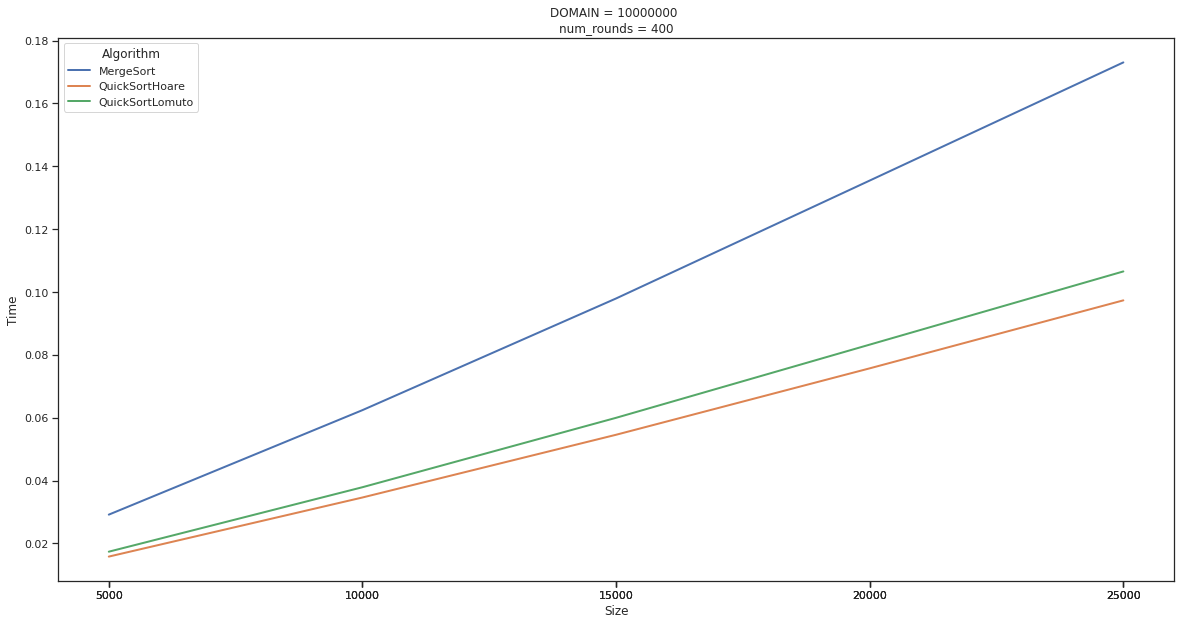

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log')
#fig = plt.figure()
plt.title("DOMAIN = 10000000 \nnum_rounds = 400")
g.set(xticks=[i for i in df.Size])
plt.show()

Segundo teste:

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
MergeSort##5000,0.030723,MergeSort,5000
QuickSortHoare##5000,0.016590,QuickSortHoare,5000
QuickSortLomuto##5000,0.017963,QuickSortLomuto,5000
MergeSort##6000,0.037125,MergeSort,6000
QuickSortHoare##6000,0.020416,QuickSortHoare,6000
QuickSortLomuto##6000,0.022233,QuickSortLomuto,6000
MergeSort##7000,0.044297,MergeSort,7000
QuickSortHoare##7000,0.024331,QuickSortHoare,7000
QuickSortLomuto##7000,0.026622,QuickSortLomuto,7000
MergeSort##8000,0.051607,MergeSort,8000


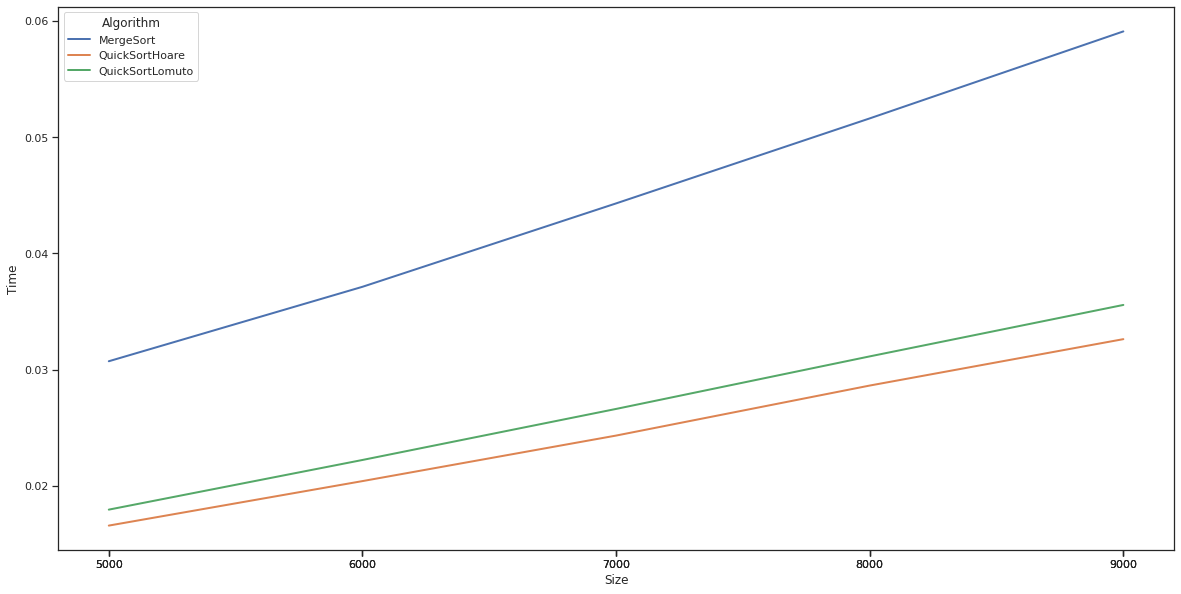

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log')
#fig = plt.figure()
g.set(xticks=[i for i in df.Size])
plt.show()